# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle
import numpy as np

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 2D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below.

In [2]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
labels, uniqueindices = np.unique(y_train, return_index=True)
n_classes = len(labels)

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

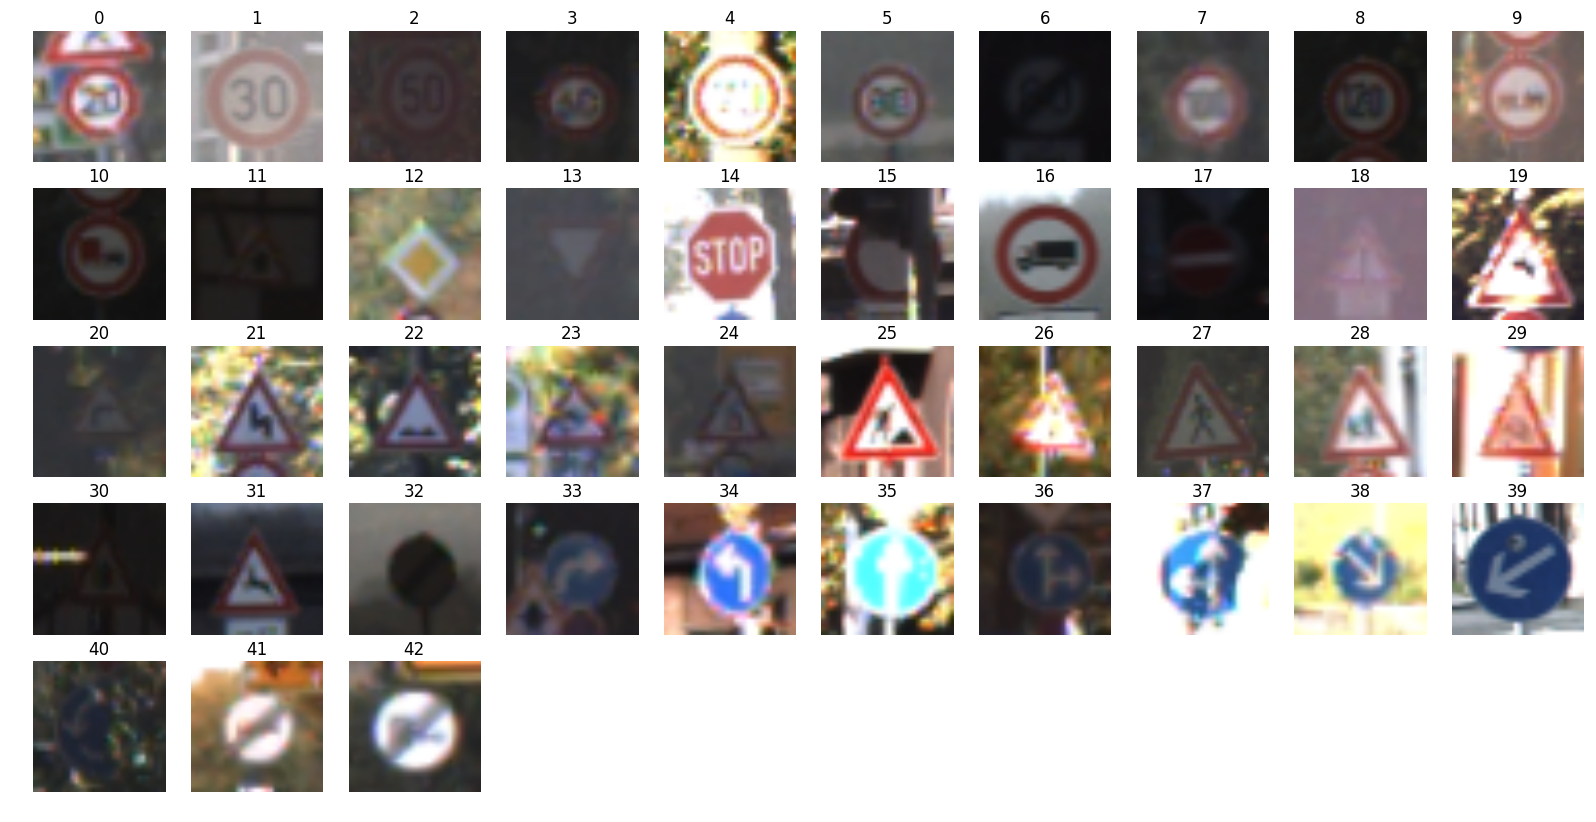

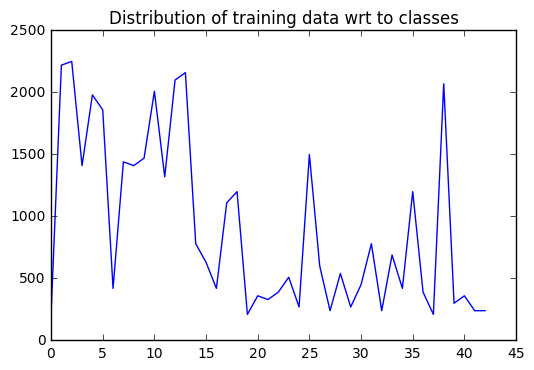

In [7]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline
fig = plt.figure(figsize=(20, 20))
x = 0
#The following loop plots one image from each 43 classes
for i in uniqueindices:
    x += 1
    fig.add_subplot(10, 10, x)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(str(y_train[i]))
count = []
for i in labels:
    count.append(np.sum(y_train == i)) 

fig2 = plt.figure()   
plt.plot(count)
plt.title('Distribution of training data wrt to classes')
plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Neural network architecture
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

**NOTE:** The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play!

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [12]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.
#Using training data statistics to normalize both training and testing data
# X_train_normalized = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
# X_test_normalized = (X_test - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)

X_train_normalized = X_train / 255 - 0.5
X_test_normalized = X_test / 255 - 0.5

### Question 1 

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:** Noramalized all the images such that all the pixel values lie between -0.5 and 0.5

I chose this technique because it is very simple to implement and it makes the optimization more efficient. Keeping the input data close to 0 prevents the weights from becoming large

Train Images and their corresponding transformed images
Generating images for label 0
710
Generating images for label 1
2220
Generating images for label 2
2250
Generating images for label 3
1410
Generating images for label 4
1980
Generating images for label 5
1860
Generating images for label 6
500
Generating images for label 7
1440
Generating images for label 8
1410
Generating images for label 9
1470
Generating images for label 10
2010
Generating images for label 11
1320
Generating images for label 12
2100
Generating images for label 13
2160
Generating images for label 14
780
Generating images for label 15
630
Generating images for label 16
500
Generating images for label 17
1110
Generating images for label 18
1200
Generating images for label 19
500
Generating images for label 20
500
Generating images for label 21
500
Generating images for label 22
500
Generating images for label 23
510
Generating images for label 24
500
Generating images for label 25
1500
Generating images for label 2

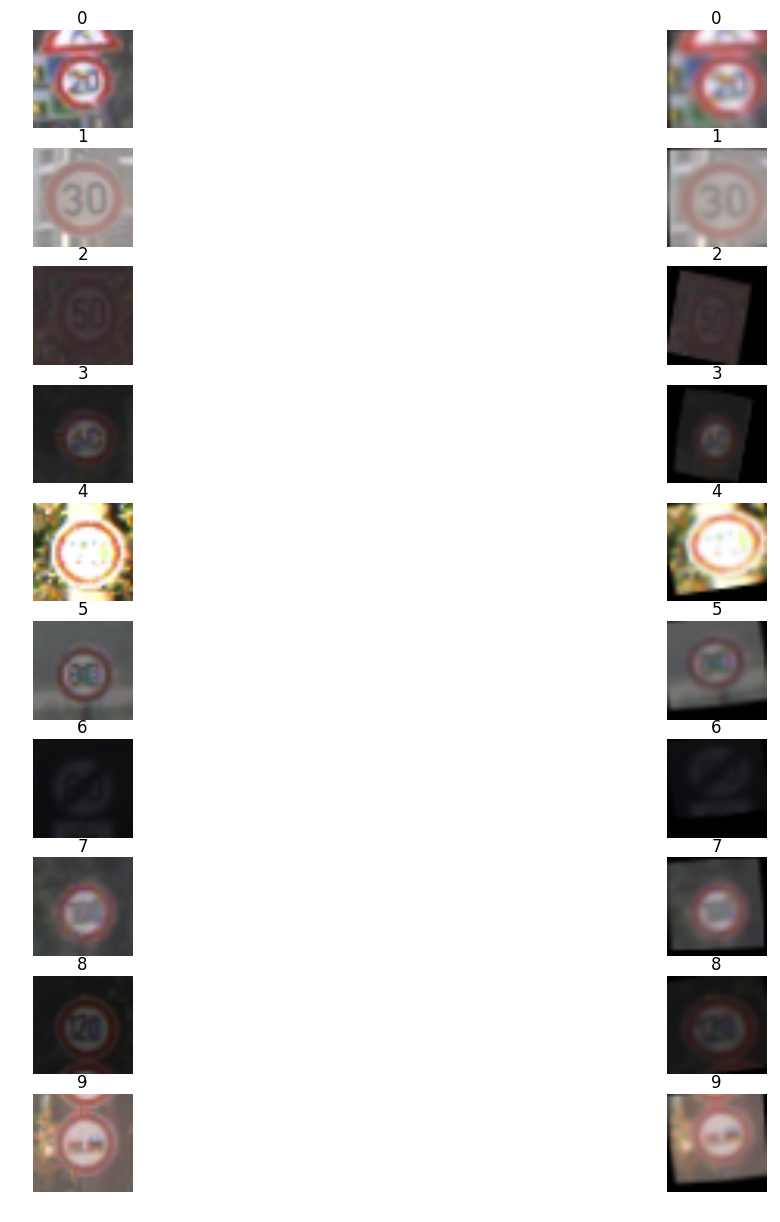

In [55]:
### Generate data additional data (OPTIONAL!)
def transform_image(img,ang_range = 15,shear_range = 5,trans_range = 5):
    
    # Rotation

    ang_rot = ang_range * np.random.uniform()-ang_range/2
    rows,cols,ch = img.shape    
    Rot_M = cv2.getRotationMatrix2D((cols/2,rows/2),ang_rot,1)

    # Translation
    tr_x = trans_range*np.random.uniform()-trans_range/2
    tr_y = trans_range*np.random.uniform()-trans_range/2
    Trans_M = np.float32([[1,0,tr_x],[0,1,tr_y]])

    # Shear
    pts1 = np.float32([[5,5],[20,5],[5,20]])

    pt1 = 5+shear_range*np.random.uniform()-shear_range/2
    pt2 = 20+shear_range*np.random.uniform()-shear_range/2

    pts2 = np.float32([[pt1,5],[pt2,pt1],[5,pt2]])

    shear_M = cv2.getAffineTransform(pts1,pts2)
        
    img = cv2.warpAffine(img,Rot_M,(cols,rows))
    img = cv2.warpAffine(img,Trans_M,(cols,rows))
    img = cv2.warpAffine(img,shear_M,(cols,rows))
    
    return img

labels, uniqueindices = np.unique(y_train, return_index=True)
fig = plt.figure(figsize=(15, 15))
x = 0
#The following loop plots few training images and their corresponding transformed images
print("Train Images and their corresponding transformed images")
for i in uniqueindices[0:10]:
    x += 1
    fig.add_subplot(10, 2, x)
    plt.imshow(X_train[i])
    plt.title(str(y_train[i]))
    plt.axis('off')
    x += 1
    fig.add_subplot(10, 2, x)
    plt.imshow(transform_image(X_train[i]))
    plt.axis('off')
    plt.title(str(y_train[i]))
    
#Finding number of training images in each label
count = {}
genNum = {}
for i in labels:
    print("Generating images for label {}".format(i))
    count[i] = np.sum(y_train == i)
    print(count[i])
    genNum[i] = 2000 - count[i] if count[i]<2000 else 0
    if genNum[i] > 0:
        X_tain_i = X_train[y_train == i]
        for j in range(genNum[i]):
            randindex = np.random.choice(len(X_tain_i),1)
            genimage = transform_image(X_tain_i[randindex].squeeze())
            genimage = np.expand_dims(genimage, axis = 0)
            X_train = np.concatenate((X_train, genimage),axis = 0)
            y_train = np.concatenate((y_train, [i]), axis = 0)

for i in labels:
    count[i] = np.sum(y_train == i)
    print(count[i])

In [59]:
#Shuffle and save the augmented data in 'train_aug.p'
shuffle = np.random.choice(len(y_train), len(y_train), replace=False)

X_train_aug = X_train[shuffle]
y_train_aug = y_train[shuffle]

train ={}
train['features'] = X_train_aug
train['labels'] = y_train_aug

pickle.dump( train, open( "train_aug.p", "wb" ) )



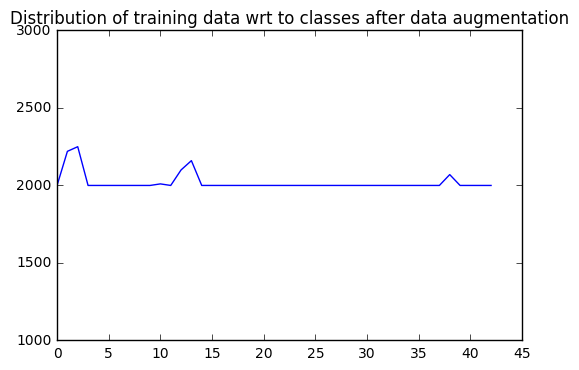

Number of training examples = 69448
Number of validation examples = 17362
Number of testing examples = 12630


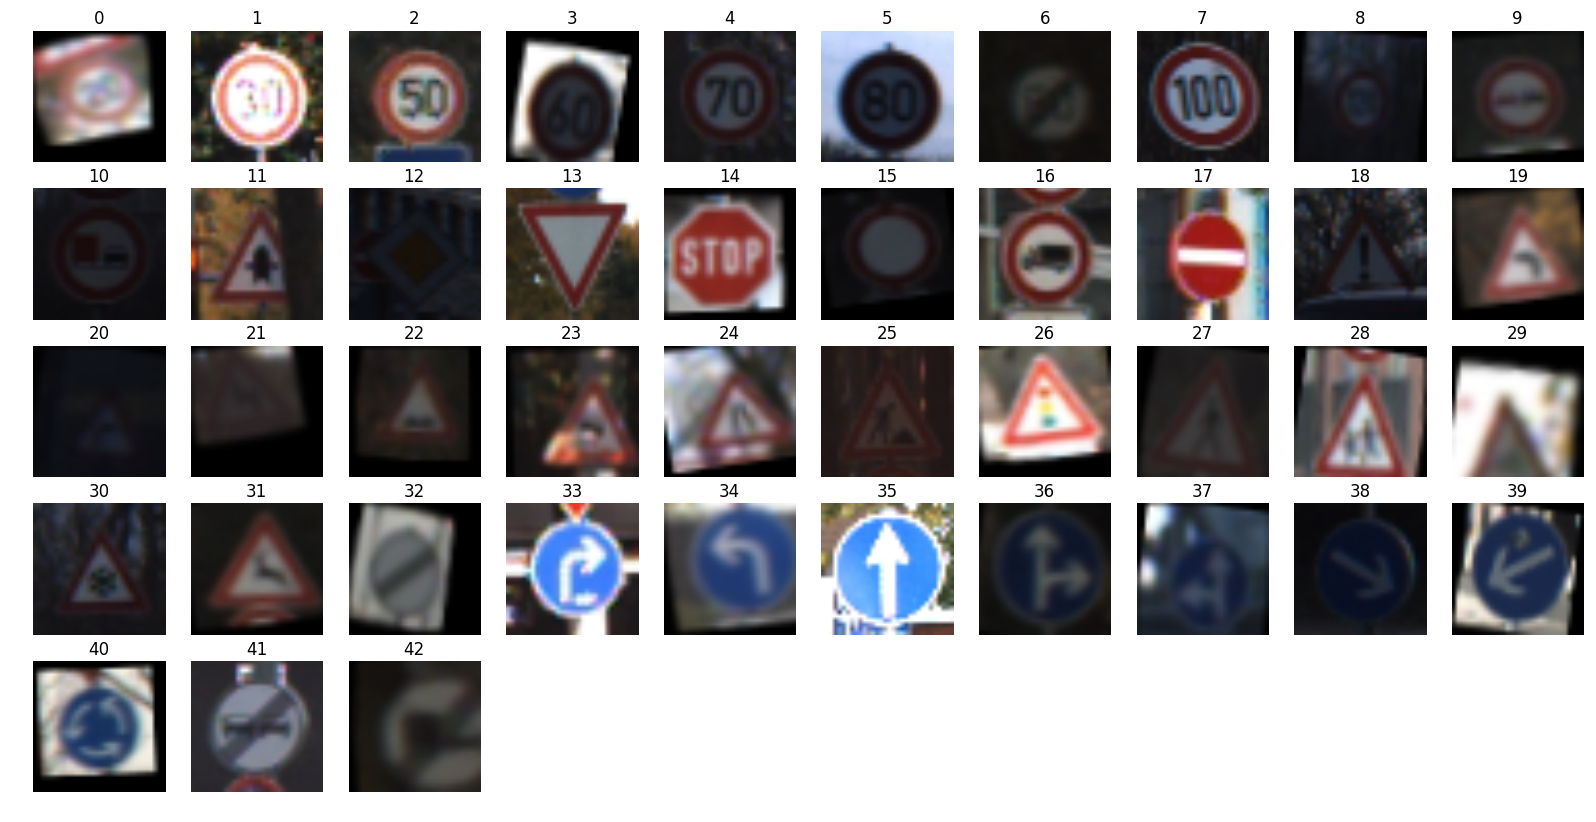

In [9]:
###Load the augmented data
### and split the data into training/validation/testing sets here.
training_file = 'train_aug.p'
# training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

labels, uniqueindices = np.unique(y_train, return_index=True)
count = []
for i in labels:
    count.append(np.sum(y_train == i)) 

fig2 = plt.figure()   
plt.plot(count)
plt.title('Distribution of training data wrt to classes after data augmentation')
plt.axis((0,45,1000,3000))
plt.show()

from sklearn.cross_validation import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, train_size=0.8, test_size=0.20, random_state=42)
n_train = len(X_train)
n_val = len(X_val)
n_test = len(X_test)
print("Number of training examples =", n_train)
print("Number of validation examples =", n_val)
print("Number of testing examples =", n_test)
### Feel free to use as many code cells as needed.
##normalize the training and testing data
labels, uniqueindices = np.unique(y_train, return_index=True)
fig = plt.figure(figsize=(20, 20))
x = 0
#The following loop plots one image from each 43 classes
for i in uniqueindices:
    x += 1
    fig.add_subplot(10, 10, x)
    plt.imshow(X_train[i])
    plt.axis('off')
    plt.title(str(y_train[i]))
# X_train = (X_train - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
# X_test = (X_test - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
# X_val = (X_val - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
X_train = X_train / 255 - 0.5
X_test = X_test / 255 - 0.5
X_val = X_val / 255 - 0.5

### Question 2

_Describe how you set up the training, validation and testing data for your model. **Optional**: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

>I used the testing data as it is and divided training data into training and validation data with a ration of 4:1

>I generated additional data by randomly rotating, translating and shearing the training images. I tried to make the number of training examples per class to be atleast 2000. So if the number of training examples of a class is less than 2000 I generate new images inorder to reach the number 2000. If the number of training data per class is equal that prevents any bias during training

In [5]:
### Define your architecture here.
#The following models is basically LeNet with dropout layers added to fully connected layers
import tensorflow as tf
from tensorflow.contrib.layers import flatten
from tensorflow.contrib.layers import flatten

def LeNet(x, kp):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 30x30x32.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 3, 32), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(32))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b
    conv1 = tf.nn.relu(conv1)
    
    # SOLUTION: Layer 2: Convolutional. Output = 28x28x32.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 32), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(32))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 28x28x32. Output = 14x14x32.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv2 = tf.nn.dropout(conv2, keep_prob = kp)
    
    
    # SOLUTION: Layer 3: Convolutional. Iutput = 14x14x32. Output = 12x12x64
    conv3_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 32, 64), mean = mu, stddev = sigma))
    conv3_b = tf.Variable(tf.zeros(64))
    conv3   = tf.nn.conv2d(conv2, conv3_W, strides=[1, 1, 1, 1], padding='VALID') + conv3_b
    conv3 = tf.nn.relu(conv3)
    
    # SOLUTION: Layer 4: Convolutional. Iutput = 12x12x64. Output = 10x10x64
    conv4_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 64), mean = mu, stddev = sigma))
    conv4_b = tf.Variable(tf.zeros(64))
    conv4   = tf.nn.conv2d(conv3, conv4_W, strides=[1, 1, 1, 1], padding='VALID') + conv4_b
    conv4 = tf.nn.relu(conv4)
    
    # SOLUTION: Pooling. Input = 10x10x64. Output = 5x5x64.
    conv4 = tf.nn.max_pool(conv4, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')
    conv4 = tf.nn.dropout(conv4, keep_prob = kp)
    
    # SOLUTION: Layer 5: Convolutional. Iutput = 5x5x64. Output = 3x3x128
    conv5_W = tf.Variable(tf.truncated_normal(shape=(3, 3, 64, 128), mean = mu, stddev = sigma))
    conv5_b = tf.Variable(tf.zeros(128))
    conv5   = tf.nn.conv2d(conv4, conv5_W, strides=[1, 1, 1, 1], padding='VALID') + conv5_b
    conv5 = tf.nn.relu(conv5)
    
    # SOLUTION: Flatten. Input = 3x3x128. Output = 1152.
    fc0   = flatten(conv5)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 2048. Output = 1024.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(1152, 1024), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(1024))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    fc1 = tf.nn.dropout(fc1, keep_prob = kp)

    # SOLUTION: Layer 4: Fully Connected. Input = 1024. Output = 1024.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(1024, 1024), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(1024))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    fc2 = tf.nn.dropout(fc2, keep_prob = kp)

    # SOLUTION: Layer 5: Fully Connected. Input = 1024. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(1024, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits
### Feel free to use as many code cells as needed.

### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

**Network Architecture**
> Input(32x32x3) - Convolution(3x3x32) - Convolution(3x3x32) - Maxpool(2x2) - Dropout(0.6) - Convolution(3x3x64) - Convolution(3x3x64) - Maxpool(2x2) - Dropout(0.6) - Convolution(3x3x128) - Flatten(1152) - FC(1024) - Dropout(0.6) -  FC(512) - FC(43) 

I have used Valid padding in all the layers in my network. The change in dimension of the data flow is shown below

**Dimensions of Data Flow**
>(32x32x3) - (30x30x32) - (28x28x32) - (14x14x32) - (12x12x64) - (10x10x64) - (5x5x64) - (3x3x128) - (1152) - (1024) - (512) - (43)



In [6]:
### Train your model here.

X = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None, ))
learning_rate = tf.placeholder(tf.float32)
keep_prob = tf.placeholder(tf.float32)
one_hot_y = tf.one_hot(y, 43)

logits = LeNet(X, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate).minimize(loss)
init = tf.global_variables_initializer()

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

In [7]:
epochs = 50
batch_size = 128
sess = tf.Session()
sess.run(init)

lrate = 0.001
for x in range(epochs):
    niter = int(len(X_train)/batch_size)
    for i in range(niter):
        X_batch = X_train[i*batch_size:(i+1)*batch_size]
        y_batch = y_train[i*batch_size:(i+1)*batch_size]
        sess.run(optimizer, feed_dict={X: X_batch ,y: y_batch, keep_prob: 0.5, learning_rate: lrate})
    valaccuracy = []
    validationiter = int(len(X_val)/batch_size)
    for i in range(validationiter):
        Xval_batch = X_val[i*batch_size:(i+1)*batch_size]
        yval_batch = y_val[i*batch_size:(i+1)*batch_size]
        valaccuracy.append(sess.run(accuracy_operation, feed_dict={X:Xval_batch, y:yval_batch, keep_prob: 1}))
    print("Epoch: {}    Validation accuracy:{:.3f}".format(x, np.mean(np.array(valaccuracy))))
### Feel free to use as many code cells as needed.

Epoch: 0    Validation accuracy:0.244
Epoch: 1    Validation accuracy:0.658
Epoch: 2    Validation accuracy:0.851
Epoch: 3    Validation accuracy:0.919
Epoch: 4    Validation accuracy:0.955
Epoch: 5    Validation accuracy:0.964
Epoch: 6    Validation accuracy:0.969
Epoch: 7    Validation accuracy:0.974
Epoch: 8    Validation accuracy:0.980
Epoch: 9    Validation accuracy:0.985
Epoch: 10    Validation accuracy:0.985
Epoch: 11    Validation accuracy:0.987
Epoch: 12    Validation accuracy:0.988
Epoch: 13    Validation accuracy:0.981
Epoch: 14    Validation accuracy:0.989
Epoch: 15    Validation accuracy:0.991
Epoch: 16    Validation accuracy:0.986
Epoch: 17    Validation accuracy:0.992
Epoch: 18    Validation accuracy:0.990
Epoch: 19    Validation accuracy:0.989
Epoch: 20    Validation accuracy:0.991
Epoch: 21    Validation accuracy:0.994
Epoch: 22    Validation accuracy:0.993
Epoch: 23    Validation accuracy:0.994
Epoch: 24    Validation accuracy:0.993
Epoch: 25    Validation accuracy:0.

In [8]:
#Saving the trained network
try:
    saver
except NameError:
    saver = tf.train.Saver()
    saver.save(sess, 'lenet')
print('Model Saved')

Model Saved


In [9]:
#Retrieving the saved model and running it on test data to find test accuracy
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    testaccuracy = []
    testiter = int(len(X_test)/batch_size)
    for i in range(testiter):
        Xtest_batch = X_test[i*batch_size:(i+1)*batch_size]
        ytest_batch = y_test[i*batch_size:(i+1)*batch_size]
        testaccuracy = sess.run(accuracy_operation, feed_dict={X:Xtest_batch, y:ytest_batch, keep_prob: 1})
    print("testing accuracy: {:0.3f}".format(testaccuracy))


testing accuracy: 0.984


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:** 
>Optimizer  : Adamoptimizer

>batch_size : 128

>epochs     : 100

>hyperparameters : mu = 0, sigma = 0.1 for weight initialization,
                  learning rate = 0.0001,
                  dropout keep_prob: 0.6

### Question 5


_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer:**

> I first tried LeNet with dropout attached to the fully connected layers, but it did not show satisfactory performance, therefore I tried to look at different network architectures out there and the network that is mentioned in the research paper mentioned in the jupyter notebook. I tried to combine all the networks and tried to create my own network. Then I started to train the network, but the performance was not good initially, then I tried to tune the hyper parameters and then the network started to show some improvement. After a lot of trial and error I was able to achieve a testing accuracy of about 98.4 percent

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

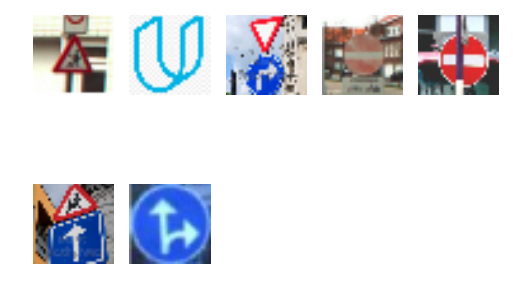

In [10]:

import csv
signnames = {}
#The following loop reads the 'signnames.csv' file and creates a dictionary of labels and their 
#corresponding names
with open('signnames.csv', 'rt') as csvfile:
    signreader = csv.reader(csvfile)
    for x in signreader:
        signnames[x[0]] = x[1]
### Load the custom test images, resizing them to 32x32x3 and saving them in ReshapedImages folder and 
#ploting them
import os
import cv2
for x in os.listdir('Images'):
    img = cv2.imread(os.path.join('Images',x))
    outimagepath = os.path.join('ReshapedImages',x)
    cv2.imwrite(outimagepath, cv2.resize(img, (32,32)))

fig = plt.figure()
y = 0
custom_Xtest = []
custom_ytrain = []
for imagename in os.listdir('ReshapedImages'):
    y += 1
    img = cv2.imread(os.path.join('ReshapedImages',imagename))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    fig.add_subplot(2,5,y)
    custom_Xtest.append(img)
    plt.imshow(img)
    plt.axis('OFF')

custom_Xtest = np.array(custom_Xtest)
custom_Xtest_normalized = (custom_Xtest - np.mean(X_train, axis = 0)) / np.std(X_train, axis = 0)
    

    
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook._



**Answer:** I have choosed 7 images to test my model. The following shows the details about the images

> 4 images are very similar to the images in training data

> 1 image is Udacity logo. I tried this because I want to see the network reaction for an image which is not a traffic sign

> 2 images have two traffic signs in them. I want to see how network behaves in this case

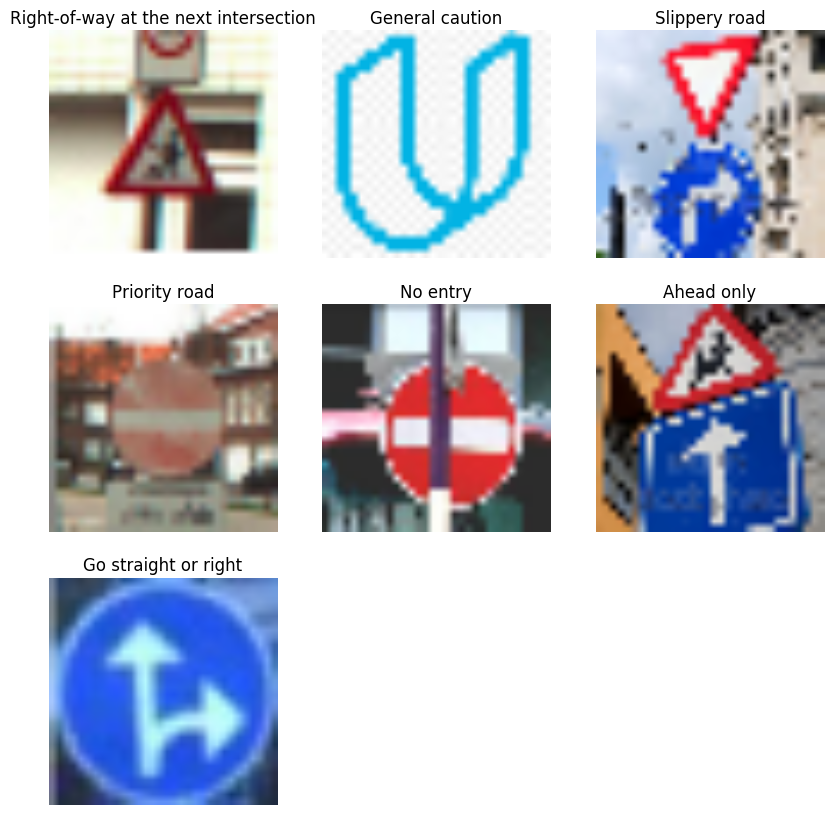

In [11]:
### Run the predictions here.
#Running predictions on the custom images and printing the lable as detected by the saved network
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    output = sess.run(logits, feed_dict={X:custom_Xtest_normalized, keep_prob: 1})
outputclass = np.argmax(output, axis = 1)
fig = plt.figure(figsize = (10,10))
for i, image in enumerate(custom_Xtest):
    fig.add_subplot(3,3,i+1)
    plt.imshow(image)
    plt.axis('OFF')
    plt.title(signnames[str(outputclass[i])])
    
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_**NOTE:** You could check the accuracy manually by using `signnames.csv` (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in `signnames.csv` and see if it matches the sign from the image._


**Answer:**

> The model performed pretty good on the images that are similar to the ones in the training data with an accuracy of 80%

> For the Udacity logo image the network detected it as General Caution even though there are no similarityies between them

> For the images with two traffic signs the network was correct for one image

In [12]:
### Visualize the softmax probabilities here.
#Printing top 3 labels for the custom images
with tf.Session() as sess:
    loader = tf.train.import_meta_graph('lenet.meta')
    loader.restore(sess, tf.train.latest_checkpoint('./'))
    top_K_values, top_K_indices = sess.run(tf.nn.top_k(output, k=3 ))
top_K_labels = []
for x in top_K_indices:
    dummy = []
    for y in x:
        dummy.append(signnames[str(y)])
    top_K_labels.append(dummy)
    print(dummy)
        
### Feel free to use as many code cells as needed.

['Right-of-way at the next intersection', 'Double curve', 'Dangerous curve to the left']
['General caution', 'Pedestrians', 'Go straight or right']
['Slippery road', 'Roundabout mandatory', 'Keep left']
['Priority road', 'Stop', 'Yield']
['No entry', 'Stop', 'Bumpy road']
['Ahead only', 'Go straight or left', 'Turn left ahead']
['Go straight or right', 'Ahead only', 'Turn right ahead']


### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

**Answer:**

>1. ['Right-of-way at the next intersection', 'Double curve', 'Dangerous curve to the left']
 All first three pics are wrong

>2. ['General caution', 'Pedestrians', 'Go straight or right']
 All first three pics are wrong

>3. ['Slippery road', 'Roundabout mandatory', 'Keep left']
 All first three pics are wrong
 
>4. ['Priority road', 'Stop', 'Yield']
 All first three pics are wrong
 
>5. ['No entry', 'Stop', 'Bumpy road']
 Correctly classified

>6. ['Ahead only', 'Go straight or left', 'Turn left ahead']
 Correctly classified

>7. ['Go straight or right', 'Ahead only', 'Turn right ahead']
 Correctly classified


> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.